In [6]:
import spe2py as spe
from io import StringIO
import spe_loader as sl
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def get_background_info(spe_tools, metadata):
    
    filepath = spe_tools.filepath
    raw_filepath = filepath[:-4] + "-raw.spe"
    # print(raw_filepath)
    
    bkg_class = metadata.SpeFormat.DataHistories.DataHistory.Origin.Experiment.Devices.Cameras.Camera.Experiment.OnlineCorrections.BackgroundCorrection
    bkg_clt = bkg_class.Enabled.cdata
    
    if bkg_clt == 'True':
        raw_file = sl.load_from_files([raw_filepath])

        raw_data = raw_file.data[0][0][0]
        bkg_data =  spe_tools.data[0][0][0] - raw_data

        # bkg_data = bkg_class.ReferenceFile.cdata
    else:
        bkg_data = None
    
    return bkg_data

def get_exposure_time(metadata):
    et = metadata.SpeFormat.DataHistories.DataHistory.Origin.Experiment.Devices.Cameras.Camera.ShutterTiming.ExposureTime.cdata
    return et

def get_accumulation_info(metadata):
    acc_class = metadata.SpeFormat.DataHistories.DataHistory.Origin.Experiment.Devices.Cameras.Camera.Experiment.OnlineProcessing.FrameCombination
    acc_val = acc_class.FramesCombined.cdata
    acc_method = acc_class.Method.cdata
    
    return acc_val, acc_method

def get_grating_info(metadata):
    
    grating_class = metadata.SpeFormat.DataHistories.DataHistory.Origin.Experiment.Devices.Spectrometers.Spectrometer.Grating
    cw_val = float(grating_class.CenterWavelength.cdata)

    #print(grating_grove(grating_class) + ' g/mm')
    #print(cw_val + ' nm')
    
    return grating_grove(grating_class), cw_val

def grating_grove(grating_class):
    grating_str = grating_class.Selected.cdata
    
    string_start = '['
    string_end = ']'
    string_to_search = ','

    grating_start = grating_str.find(string_to_search,grating_str.find(string_start),grating_str.find(string_end))+1
    grating_end = grating_str.find(string_end)
    grating_val = grating_str[grating_start:grating_end]
    #print(grating_val)
    
    return grating_val

In [3]:
file_path = '../../Projects/CAF_LC/Data/09202022/Sankhya-YbCaF2-sample_T6-1020nm_Pow_3.85mW-et_0.3sec-avg_20-300_920nm-  01-raw.spe'
spe_files = sl.load_from_files([file_path])

Successfully loaded 1 file(s) in a SpeFile object


In [7]:
spe_tools = spe_files
filepath = spe_tools.filepath
print(filepath)

x_data = spe_tools._get_wavelength()
print(x_data)

# raw_filepath = filepath[:-4] + "-raw.spe"
# print(raw_filepath)

../../Projects/CAF_LC/Data/09202022/Sankhya-YbCaF2-sample_T6-1020nm_Pow_3.85mW-et_0.3sec-avg_20-300_920nm-  01-raw.spe
[ 833.66981529  833.79897499  833.92813449 ... 1005.91998816 1006.04830573
 1006.17662225]


In [5]:
tf = 2
for idx in range(0,tf):
    file_data = spe_tools.data[idx][0][0]
    datamatrix = np.column_stack((x_data,file_data)) # Compiles corrected data into a new matrix
    # savename = filepath[:-4]+f"-{idx}.csv" # Create filename for new data
    # np.savetxt(savename, datamatrix) # Save new data
    # np.savetxt(savename,datamatrix, delimiter=',')


NameError: name 'np' is not defined

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_coords', '_get_dims', '_get_dtype', '_get_meta_dtype', '_get_roi_info', '_get_wavelength', '_read_data', '_read_footer', 'data', 'dtype', 'filepath', 'footer', 'header_version', 'metadata', 'metanames', 'nframes', 'nroi', 'roi', 'wavelength', 'xcoord', 'xdim', 'ycoord', 'ydim']


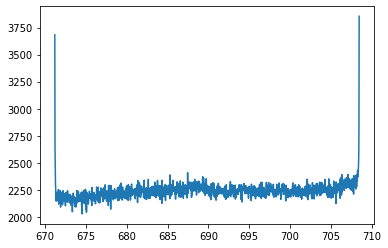

               0
3682  671.195186
2625  671.223550
2429  671.251913
2301  671.280275
2257  671.308636
...          ...
2410  708.358185
2465  708.385461
2547  708.412736
2784  708.440011
3854  708.467284

[1340 rows x 1 columns]


In [34]:
print(dir(spe_tools))
#print(type(spe_tools))
#spe_tools._get_wavelength()

metadata_footer = spe_tools.footer


grove, cw = get_grating_info(metadata_footer)
et = get_exposure_time(metadata_footer)
acc_val, acc_method = get_accumulation_info(metadata_footer)
# bkg_data = get_background_info(spe_tools, metadata_footer)

plt.plot(x_data,file_data)
plt.show()
#print(spe_tools.xmltree(spe_tools.file.footer)) # Get all available data.

## Example to access wavelength.
ws = spe_tools.footer.SpeFormat.Calibrations.WavelengthMapping.Wavelength
#print(ws)
#grating_val = metadata_footer.SpeFormat.DataHistories.DataHistory.Origin.Experiment.System.Spectrometers.Spectrometer.Turrets.Turret.Gratings.Grating
#cw_val = metadata_footer.SpeFormat.DataHistories.DataHistory.Origin.Experiment.System.Spectrometers.Spectrometer.Turrets.Turret.Gratings.Grating

import numpy as np
import pandas as pd

df = pd.DataFrame(x_data.transpose(),file_data.transpose())
print(df)

#print(grating_val)
#wavelength_string = StringIO(ws.cdata)

#wavelength = np.loadtxt(wavelength_string, delimiter=',')